### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID column
application_df = application_df.drop(columns = ["EIN"])

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Remove 'first time' application companies
company_applied = application_df.NAME.value_counts()
company_applied

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
JIMENA INC                                            1
LIVING IN WELLNESS CENTER INC                         1
ROTARY CLUB OF WINNEMUCCA NV USA                      1
PRIDE OF THE WEST MASONIC LODGE NO 53                 1
SANTA CRUZ SUMMIT WEST INC                            1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

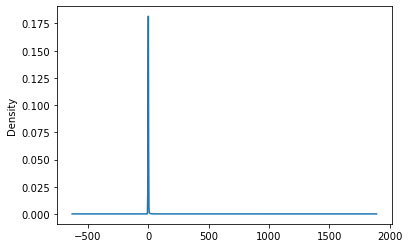

In [5]:
company_applied.plot.density()

In [6]:
# Determine which values to replace if counts are less than 5
replace_company = list(company_applied[company_applied<=5].index)

# Replace in dataframe
for app in replace_company:
    application_df.NAME = application_df.NAME.replace(app,"Infrequent_Applicant")

# Occasional Applicant
replace_company = list(company_applied[company_applied<=50].index)

# Replace in dataframe
for app in replace_company:
    application_df.NAME = application_df.NAME.replace(app,"Occasional Applicant")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Infrequent_Applicant                                                  20043
Occasional Applicant                                                   4602
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONA

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df.APPLICATION_TYPE.value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
pd.DataFrame(application_count).describe()

,APPLICATION_TYPE
count,17.000000
mean,2017.588235
std,6468.877251
min,1.000000
25%,3.000000
50%,156.000000
75%,1065.000000
max,27037.000000


<AxesSubplot:ylabel='Density'>

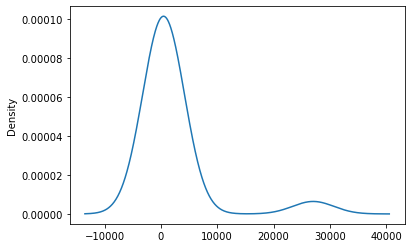

In [9]:
# Visualize the value counts of APPLICATION_TYPE
application_count.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_count[application_count<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
pd.set_option('display.max_rows', classification_count.shape[0]+1)
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C4100        6
C2400        6
C1720        6
C1257        5
C1600        5
C1260        3
C0           3
C2710        3
C1234        2
C1267        2
C3200        2
C1246        2
C1256        2
C1728        1
C2170        1
C1245        1
C1820        1
C1370        1
C2150        1
C2190        1
C1570        1
C1732        1
C1900        1
C2500        1
C4200        1
C2561        1
C1580        1
C2600        1
C8210        1
C4500        1
C1283        1
C1236        1
C4120        1
C3700        1
C1248     

<AxesSubplot:ylabel='Density'>

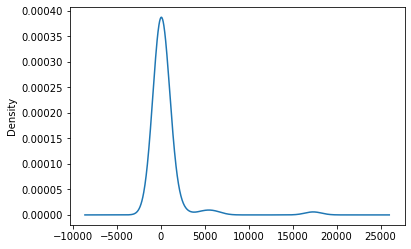

In [12]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [15]:
# Generate our categorical variable lists
application_cat = application_df.select_dtypes(include='object')
application_cat

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,Occasional Applicant,T10,Independent,C1000,ProductDev,Association,0,N
1,Infrequent_Applicant,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,Infrequent_Applicant,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,Infrequent_Applicant,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,Infrequent_Applicant,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...,...
34294,Infrequent_Applicant,T4,Independent,C1000,ProductDev,Association,0,N
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,Infrequent_Applicant,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,Infrequent_Applicant,T5,Independent,C3000,ProductDev,Association,0,N


In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_cat))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat.columns)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DEMOLAY INTERNATIONAL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(application_cat.columns,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(columns =['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layers
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                8550      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 15,871
Trainable params: 15,871
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a call back saving model weights every 5 epochs
os.makedirs("checkpoints", exist_ok=True)
checkpoint_path ="checkpoints/weightsOptimize.{epoch:02d}.hdf5"

BATCH_SIZE = 20
STEPS_PER_EPOCH = len(X_train)/BATCH_SIZE
SAVE_PERIOD=5

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=int(SAVE_PERIOD*STEPS_PER_EPOCH)
    )

In [23]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    batch_size = BATCH_SIZE,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=200,
    callbacks=[cp_callback])

del to checkpoints\weightsOptimize.55.hdf5
1286/1286 [==============================] - 1s 785us/step - loss: 0.4492 - accuracy: 0.7834
Epoch 56/200
1286/1286 [==============================] - 1s 1ms/step - loss: 0.4500 - accuracy: 0.7804
Epoch 57/200
1286/1286 [==============================] - 1s 1ms/step - loss: 0.4566 - accuracy: 0.7756
Epoch 58/200
1286/1286 [==============================] - 1s 875us/step - loss: 0.4510 - accuracy: 0.7796
Epoch 59/200
1286/1286 [==============================] - 1s 881us/step - loss: 0.4512 - accuracy: 0.7787
Epoch 60/200
1227/1286 [===========================>..] - ETA: 0s - loss: 0.4560 - accuracy: 0.7772
Epoch 00060: saving model to checkpoints\weightsOptimize.60.hdf5
1286/1286 [==============================] - 1s 927us/step - loss: 0.4559 - accuracy: 0.7773
Epoch 61/200
1286/1286 [==============================] - 1s 766us/step - loss: 0.4477 - accuracy: 0.7812
Epoch 62/200
1286/1286 [==============================] - 1s 808us/step - loss: 

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6065 - accuracy: 0.7613
Loss: 0.6065409779548645, Accuracy: 0.7612828016281128


In [25]:
# Save & export results
nn.save("AlphabetSoupCharity_Optimize.h5")